In [33]:
##Dan Nichosl markov model code 
import pandas as pd
import numpy as np
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


In [34]:

##Dan Nichosl markov model code 
import markovModel
from markovModel import FitnessLandscape
from markovModel import convertGenotypeToInt
from markovModel import convertIntToGenotype
import numpy as np


In [35]:
df_raw = pd.read_csv('weinreich_temp.csv')

Assuming (-) is mutant absent, (+) is mutant preset. To keep with famililar bit strong analogy. we will conver -, + to 0s and 1s. Furthermore The temperature record ("MIC") will be structure to be an additional dependent variaible (hence seascapes)

In [36]:
df_raw

,Unnamed: 0,G4205A,A42G,E104K,M182T,G238S,MIC_20,MIC_25,MIC_30,MIC_35,MIC_37,MIC_41
0,NaN,-,-,-,-,-,11.300,5.650,2.000,0.175,0.090,0.015635
1,NaN,-,-,-,-,+,724.450,256.125,256.125,2.000,1.000,0.175000
2,NaN,-,-,-,+,-,11.300,8.000,4.000,0.125,0.125,0.020000
3,NaN,-,-,-,+,+,724.450,256.125,512.250,64.030,90.550,5.650000
4,NaN,-,-,+,-,-,22.650,11.300,11.300,0.175,0.250,0.090000
5,NaN,-,-,+,-,+,4098.000,2049.000,2897.700,362.200,45.300,1.400000
6,NaN,-,-,+,+,-,16.010,11.300,16.010,0.250,0.250,0.125000
7,NaN,-,-,+,+,+,8096.000,4098.000,4098.000,1448.700,1024.500,362.200000
8,NaN,-,+,-,-,-,16.010,5.650,5.650,0.090,0.125,0.045000
9,NaN,-,+,-,-,+,1024.500,724.450,724.450,128.060,181.100,5.650000


In [5]:
lst = list(itertools.product([0,1],repeat=5))
df=pd.DataFrame(columns=['Temp','MIC','Genotype'])
df['Genotype']=np.repeat(lst,6,axis=0).tolist()
temps=np.array([20,25,30,35,37,41])
df['Temp'] =np.repeat([temps],2**5,axis=0).flatten()
df['MIC'] = df_raw.iloc[:-1,6:].values.flatten()
df['Genotype_Int'] = [convertGenotypeToInt(l) for l in df['Genotype']]

Again, as in the original nomencalture, bits are corresponding to 'G4205' 'A42G' 'E104K' 'M182T' 'G238S'

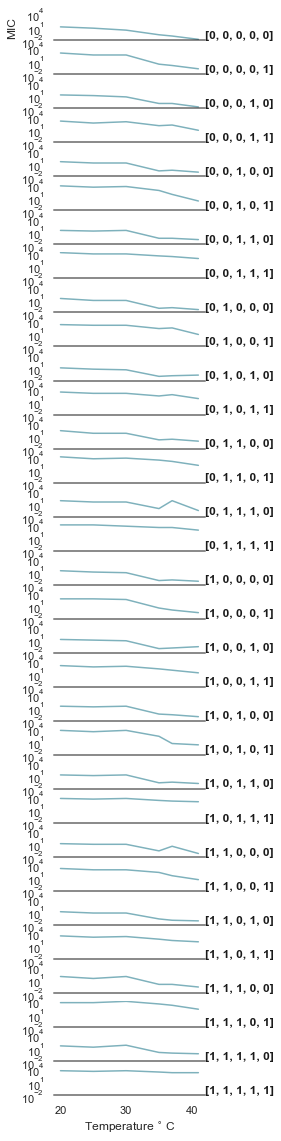

In [66]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Genotype_Int",hue= "Genotype_Int",aspect=6, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.lineplot ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(plt.fill_between ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0.01, lw=2,color='k', clip_on=False,alpha=.5)


#Define and use a simple function to label the plot in axes coordinates
def label(x,color, label):
    ax = plt.gca()
    ax.text(1, .2, convertIntToGenotype(int(label),5), fontweight="bold",color='k',
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Genotype_Int")
ax = g.facet_axis(-1,0)
ax.set_xlabel('Temperature $^{\circ}$ C')


# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)



ax = g.facet_axis(0,0)
ax.set_ylabel('MIC')



g.savefig('weinreich_ridge.pdf',facecolor=ax.get_facecolor(), edgecolor='none' )

In [55]:
G = nx.hypercube_graph(5) #establishing 5 cube

In [56]:
pos = {(0,0,0,0,0): [.5,1],
       (1,0,0,0,0): [.1,.8],(0,1,0,0,0): [.3,.8],(0,0,1,0,0): [.5,.8],(0,0,0,1,0): [.7,.8],(0,0,0,0,1): [.9,.8],
      (1,1,0,0,0):[.05,.6],(1,0,1,0,0):[.15,.6],(1,0,0,1,0):[.25,.6],(1,0,0,0,1):[.35,.6],(0,1,1,0,0):[.45,.6],(0,1,0,1,0):[.55,.6],(0,1,0,0,1):[.65,.6],(0,0,1,1,0):[.75,.6],(0,0,1,0,1):[.85,.6],(0,0,0,1,1):[.95,.6],
      (1,1,1,0,0):[.05,.4],(1,1,0,1,0):[.15,.4],(1,1,0,0,1):[.25,.4],(1,0,1,1,0):[.35,.4],(1,0,1,0,1):[.45,.4],(1,0,0,1,1):[.55,.4],(0,1,1,1,0):[.65,.4],(0,1,1,0,1):[.75,.4],(0,1,0,1,1):[.85,.4],(0,0,1,1,1):[.95,.4],
      (1,1,1,1,0):[.1,.2],(1,1,1,0,1):[.3,.2],(1,1,0,1,1):[.5,.2],(1,0,1,1,1):[.7,.2],(0,1,1,1,1):[.9,.2],
      (1,1,1,1,1):[.5,0]}

#positiong nodes manually - have tfound no automatic way to tihis well -all of the networkx energy minization tools fail to :"square" up the node the viewrs plane

In [57]:
pos = {(0,0,0,0,0): [.5,1],
       (1,0,0,0,0): [.1,.8],(0,1,0,0,0): [.3,.8],(0,0,1,0,0): [.5,.8],(0,0,0,1,0): [.7,.8],(0,0,0,0,1): [.9,.8],
      (1,1,0,0,0):[.05,.6],(1,0,1,0,0):[.15,.6],(1,0,0,1,0):[.25,.6],(1,0,0,0,1):[.35,.6],(0,1,1,0,0):[.45,.6],(0,1,0,1,0):[.55,.6],(0,1,0,0,1):[.65,.6],(0,0,1,1,0):[.75,.6],(0,0,1,0,1):[.85,.6],(0,0,0,1,1):[.95,.6],
      (1,1,1,0,0):[.05,.4],(1,1,0,1,0):[.15,.4],(1,1,0,0,1):[.25,.4],(1,0,1,1,0):[.35,.4],(1,0,1,0,1):[.45,.4],(1,0,0,1,1):[.55,.4],(0,1,1,1,0):[.65,.4],(0,1,1,0,1):[.75,.4],(0,1,0,1,1):[.85,.4],(0,0,1,1,1):[.95,.4],
      (1,1,1,1,0):[.1,.2],(1,1,1,0,1):[.3,.2],(1,1,0,1,1):[.5,.2],(1,0,1,1,1):[.7,.2],(0,1,1,1,1):[.9,.2],
      (1,1,1,1,1):[.5,0]}

#positiong nodes manually - have tfound no automatic way to tihis well -all of the networkx energy minization tools fail to :"square" up the node the viewrs plane

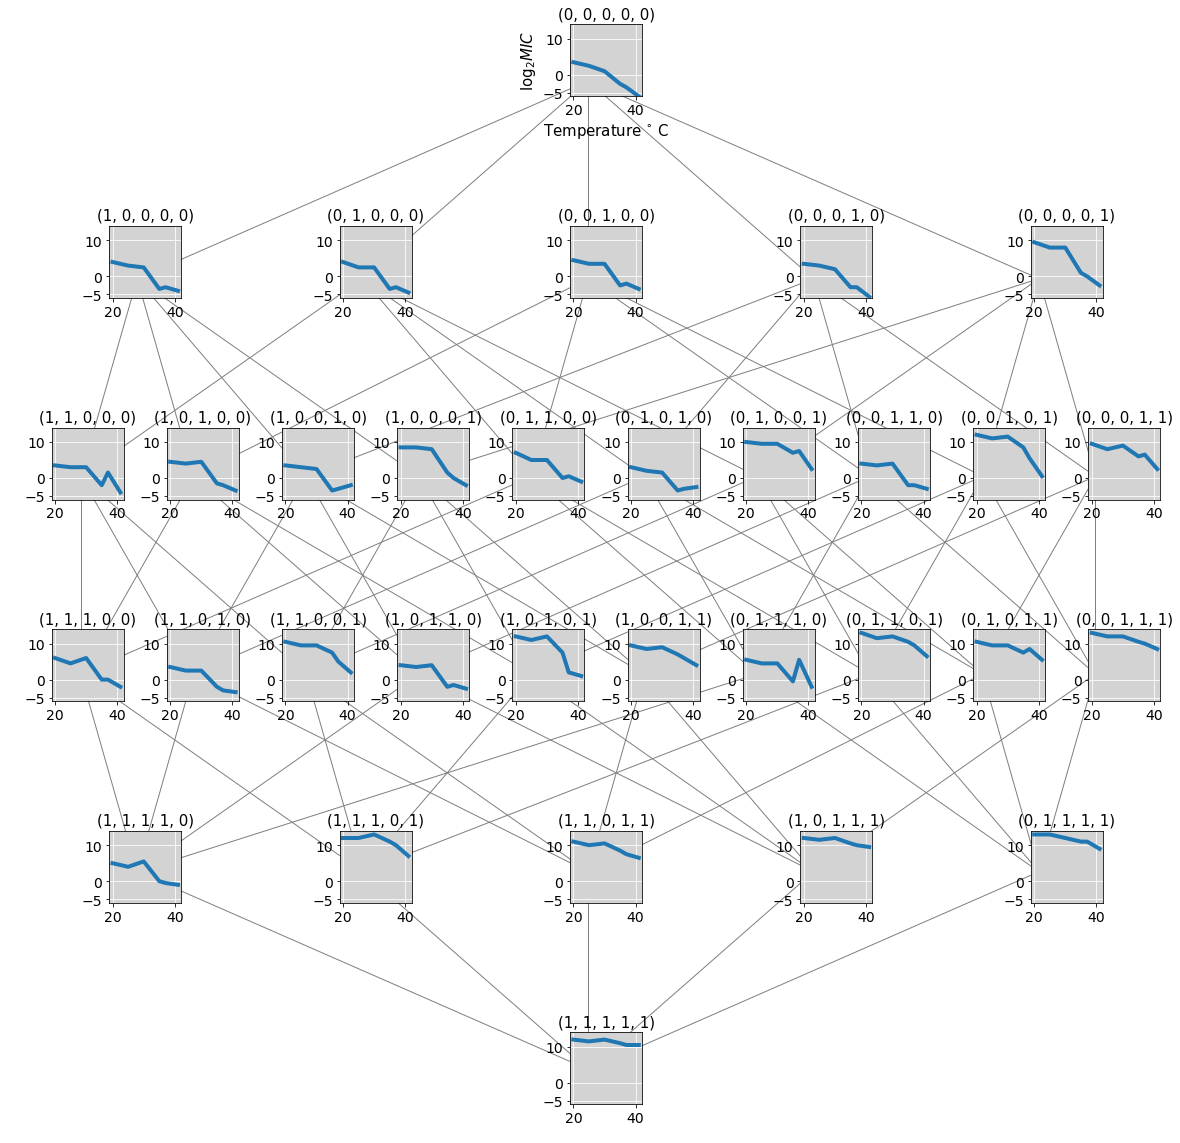

In [58]:
fig,ax=plt.subplots(figsize=(20,20))

for node in G:
    # iterate through node (single genotype)
    plt.axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .05, .05], 
             facecolor='lightgray')
    plt.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    #graph logMIC vs termature at each node
    plt.ylim(-6,14)
    plt.yticks([-5,0,10])
    plt.title(str(node),fontsize=15)
    plt.grid(color='w')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #label representative node axes
    if node == (0,0,0,0,0):
        plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
        plt.ylabel('$\log_2 MIC$',fontsize=15)
    #ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='gray')#ghis will draw the edge betweeen nodes,
#looks okay without too, but will need to adjust axis spines if this case


ax.axis('off')
plt.savefig('hypercube_ridge.pdf')

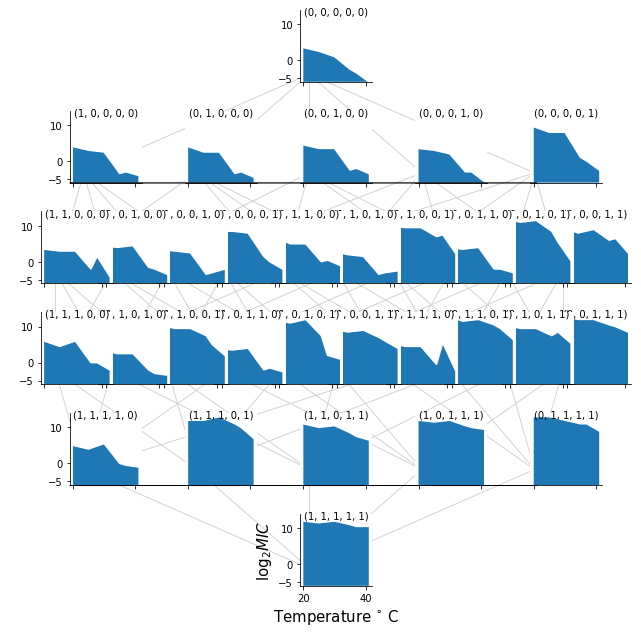

In [59]:
fig,ax=plt.subplots(figsize=(10,10))
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='lightgray')

# go though each node
for node in G:
    #make figure and axis at each node, filling log2MIC vs temp 
    ax=fig.add_axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .1, .1], 
             #facecolor='lightgray'
            )
    ax.fill_between(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],-6,
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    ax.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),'w') ##white line for serpation from over lap
    ax.set_ylim(-6,14)
    ax.set_title(str(node),fontsize=10,y=.85)
    #default function: no xlabels or top right spines
    ax.set_xticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #xaxes for border plots
    if (node != (0,0,0,0,0) and node != (1,1,1,1,1) and node != (1,0,0,0,0) and node != (1,1,0,0,0) and node != (1,1,1,0,0) and node !=(1,1,1,1,0)):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.set_xticks([20,40])
        ax.set_xticklabels([])
    else:
        ax.set_yticks([-5,0,10])
        ax.set_xticks([20,40])
        ax.set_xticklabels([])

        

    
    #axes labels for bottom plots
    if node == (1,1,1,1,1):
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_xlabel('Temperature $^{\circ}$ C',fontsize=15)
        ax.set_xticks([20,40])
        ax.set_xticklabels([20,40])
        #ax.text(.5,-.1,'Temperature $^{\circ}$ C')
        #ax.text(.4,.1,'$\log_2 MIC$',rotation=90)
    #    plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
    #    plt.gca().axison = Truer
    #    plt.ylabel('$\log_2 MIC$',fontsize=15)
    

# arrows to connect genotypes of equal mutant so theyre kind of one axis for nice visual effect fr
#ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
plt.arrow(-55,105.9,150,0,clip_on=False,zorder=10,lw=.6,color='k') ## arrows to connect genotypes of equal mutant so theyre kind of one axis
plt.arrow(-55,21.9,150,0,clip_on=False,zorder=10,lw=.6,color='k') ##mostly visual effect 
plt.savefig('hypercube_ridge2.pdf')

In [60]:
FitnessLandscape(df.loc[df['Temp'] ==20, ['MIC','Genotype_Int']].sort_values(by = 'Genotype_Int')['MIC'].values).getPeaks()

[[0, 0, 1, 1, 1], [0, 1, 1, 0, 1], [0, 1, 1, 1, 1], [1, 0, 1, 0, 1]]

In [345]:


peaks =[[convertGenotypeToInt(gen)  for gen in FitnessLandscape(df.loc[df['Temp'] ==T, ['MIC','Genotype_Int']].sort_values(by = 'Genotype_Int')['MIC'].values).getPeaks()] for T in df['Temp'].unique()]
peaks


[[7, 13, 15, 21], [15, 29], [7, 15, 23, 29], [15, 29, 31], [15], [31]]

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


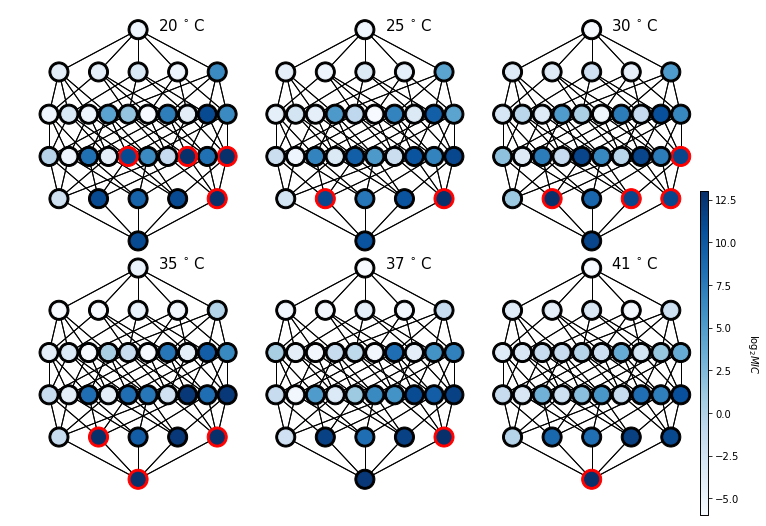

In [64]:
# for a given temperature

# MIC over genotype spaceor a given temperature - more of traditional fitness landscape

fig,axs=plt.subplots(2,3,figsize=(12,9))

vmin=np.log2(df['MIC']).min()
vmax=np.log2(df['MIC']).max()
#peaks = [[6,12,14],[14,23,29],[14,23,29,6],[14,29,31],[14],[31]]
#peaks =[[convertGenotypeToInt(gen)  for gen in MIC_20.getPeaks()]] 


peaks =[[convertGenotypeToInt(gen)  for gen in FitnessLandscape(df.loc[df['Temp'] ==T, ['MIC','Genotype_Int']].sort_values(by = 'Genotype_Int')['MIC'].values).getPeaks()] for T in df['Temp'].unique()]

    
fig.subplots_adjust(hspace=-.05)
fig.subplots_adjust(wspace=.05)
cax = fig.add_axes([0.9, 0.1, 0.01, 0.5])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm,cax=cax,)
cbar.set_label('$\log_2 MIC$', rotation=270,labelpad=20)
#plt.savefig('hypercube_all_graphs.pdf')
for ax,t,peak in zip(axs.flatten(),df['Temp'].unique(), peaks):
    #labe = nx.draw_networkx_labels(G,pos=pos,ax=ax)
    
    ax.text(.6,1,'%d $^{\circ}$ C ' % (t),fontsize=15)
    ecolors =np.repeat('k',2**5)
    ecolors[peak]='r'
    
    cols = np.zeros(32).astype(str)
    cols[:] ='w'
    cols[peak]='r'




    nx.draw(G,pos=pos,cmap=plt.cm.Blues,node_size=400,
        node_color=ecolors,ax=ax,lw=3)
    
    
    nx.draw(G,pos=pos,cmap=plt.cm.Blues,node_size=200,
        node_color=np.log2(df.loc[df['Temp']==t,'MIC']),ax=ax)

    
fig.subplots_adjust(hspace=-.05)
fig.subplots_adjust(wspace=.05)
cax = fig.add_axes([0.9, 0.1, 0.01, 0.5])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm,cax=cax,)
cbar.set_label('$\log_2 MIC$', rotation=270,labelpad=20)
plt.savefig('hypercube_all_graphs.pdf')

#ax.collections[0][1].set_edgecolor("#FF0000") 
